# Changes to Rainy River Flows 1970-2010

* <a href=#section01>Flow Data for Rainy River</a>
* <a href=#section02>Mean Annual Flow, 1970-2000 vs 2000-2010</a>
* <a href=#section03>Distribution of Flowrates, 1970-2000 vs 2000-2010</a>
* <a href=#section04>Stage-Frequency, 1970-2000 vs 2000-2010</a>
* <a href=#section05>Discharge Characteristics, 1970-2000 vs 2000-2010</a>
* <a href=#conclusions>Conclusions</a>

### Initialize Notebook

In [15]:
# Display graphics inline with the notebook
%matplotlib notebook

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Directories
dir = '../data/'
img = '../images/'

## <a name=section01></a>Flow Data for Rainy River

Historical data for flows on upper Rainy River was obtained at station 05PC019 from the HYDAT database maintained by the Water Survey of Canada. The data was extracted and stored in a Python Pandas Series object `RR` that is loaded and displayed in the following cell.

<IPython.core.display.Javascript object>


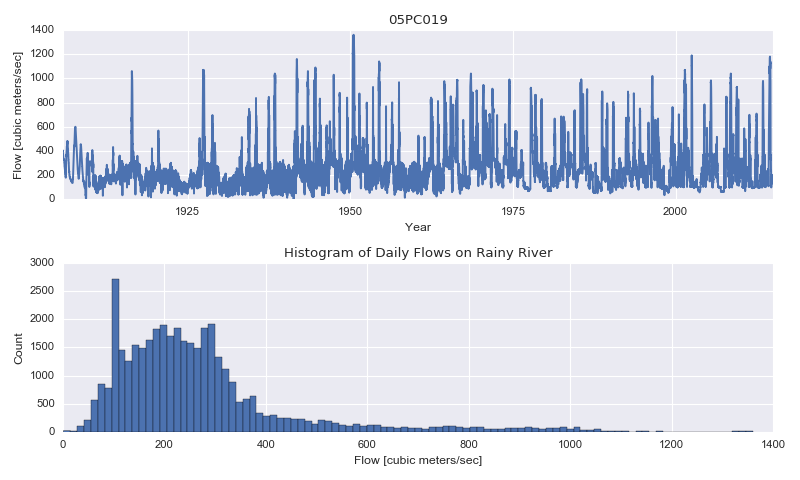

In [16]:
RR = pd.read_pickle(dir + 'RR.pkl')

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
RR.plot()
plt.title(RR.name)
plt.ylabel('Flow [cubic meters/sec]');
plt.xlabel('Year');

plt.subplot(2,1,2)
RR.hist(bins=100)
plt.xlabel('Flow [cubic meters/sec]')
plt.ylabel('Count')
plt.title('Histogram of Daily Flows on Rainy River')

plt.tight_layout()

Some contextual comparisons of flow through Rainy River.

<IPython.core.display.Javascript object>


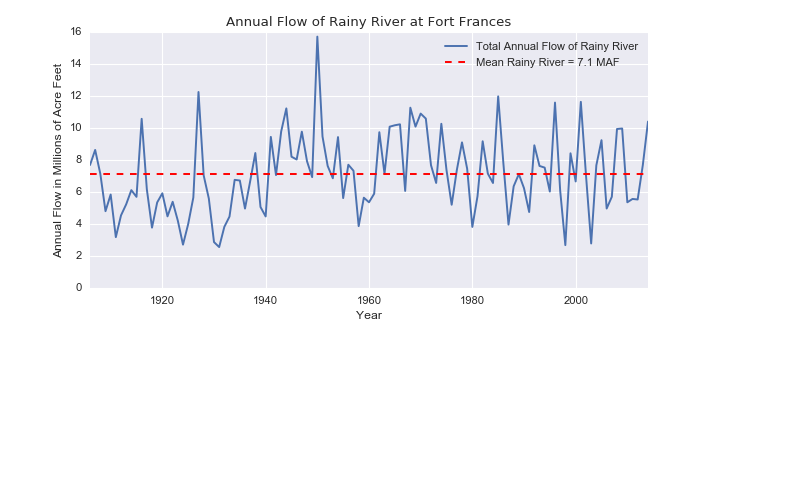

Mean Annual Flow of Rainy River at Fort Frances =  7.11 million acre-feet


In [17]:
annualflow = (0.000810713194*3600*24/1000000)*RR.groupby(RR.index.year).aggregate(np.sum)
annualflow = annualflow.loc[1906:]


plt.figure(figsize=(10,6))
annualflow.plot()
plt.title('Annual Flow of Rainy River at Fort Frances')
plt.xlabel('Year')
plt.ylabel('Annual Flow in Millions of Acre Feet')
plt.ylim([0,16])

ya = annualflow.index.min()
yb = annualflow.index.max()
plt.hold(True)
plt.plot([ya,yb],[annualflow.mean(),annualflow.mean()],'r--')

plt.hold(False)
plt.legend(['Total Annual Flow of Rainy River',
            'Mean Rainy River = 7.1 MAF'])

plt.gcf().set_size_inches(9,4)
plt.savefig(img + 'RainyRiverMeanAnnualFlowMAF.png')

print "Mean Annual Flow of Rainy River at Fort Frances = {0:5.2f} million acre-feet".format(annualflow.mean())

## <a name=section02></a>Mean Flows, 1970-2000 vs 2000-2010

The mean annual flow is a proxy for the total flow through upper Rainy River in a given year. 

<IPython.core.display.Javascript object>


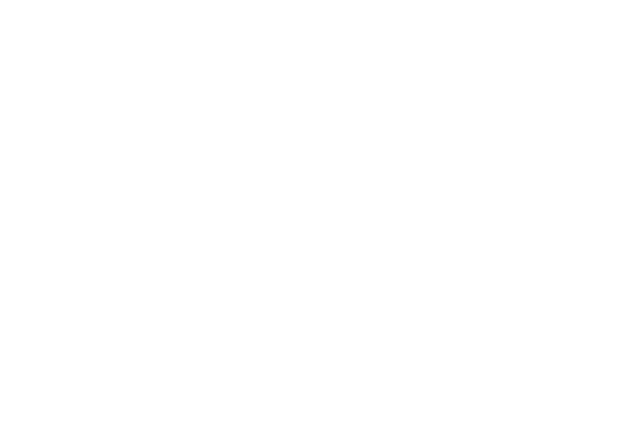

<IPython.core.display.Javascript object>


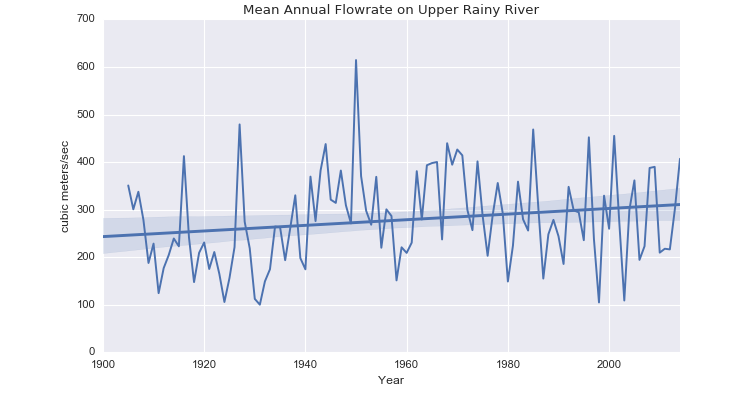

In [18]:
ts = RR.groupby(RR.index.year).aggregate(np.mean)
years = pd.Series(ts.index,name="Year")
flows = pd.Series(ts.tolist(),name="Mean Flow")

import seaborn

df = pd.concat([years,flows],axis=1)

plt.figure()

p = seaborn.lmplot("Year","Mean Flow",df)
plt.hold(True)
plt.plot(df['Year'],df['Mean Flow'])
plt.hold(False)
ax = plt.axis()
plt.ylim([0,ax[3]])
plt.xlim(1900,2014)
plt.ylabel('cubic meters/sec')
plt.title('Mean Annual Flowrate on Upper Rainy River')
plt.gcf().set_size_inches(9,4)
plt.savefig(img + 'RainyRiverMeanAnnualFlow.png')

277.898699283


<IPython.core.display.Javascript object>


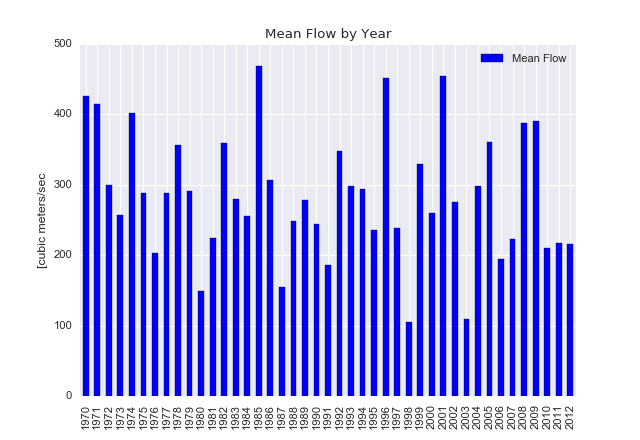

Mean Flow    288.357834
dtype: float64
Mean Flow    276.752584
dtype: float64


In [19]:
annualMeanFlow = [RR[RR.index.year == yr].mean() for yr in range(1970,2013)]
print RR.mean()

Qmean = pd.DataFrame(annualMeanFlow,index=range(1970,2013),columns=['Mean Flow'])
Qmean.plot(kind='bar')
plt.title('Mean Flow by Year')
plt.ylabel('[cubic meters/sec')

print Qmean.ix[1970:2000].mean()
plt.hold(True)
plt.plot([1970,2000],[Qmean.ix[1970:2000].mean(),Qmean.ix[1970:2000].mean()])
plt.plot([2000,2013],[Qmean.ix[2000:].mean(),Qmean.ix[2000:].mean()])
plt.hold(False)
print Qmean.ix[2000:].mean()


The key observation is that the annual mean flow through upper Rainy River was virtually identical during the period 1970-2000 and 2000-2010. But let's look at the distribution of daily flows.

## <a name=section03></a>Distribution of Flowrates, 1970-2000 vs 2000-2010

<IPython.core.display.Javascript object>


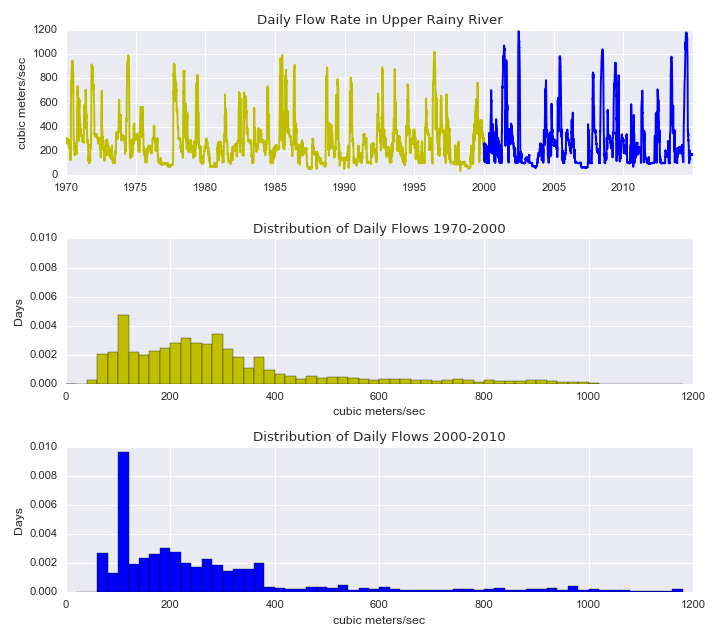

In [20]:
plt.figure(figsize=(9,8))
plt.subplot(3,1,1)
plt.hold(True)
RR['1970':'2000'].plot(color='y')
RR['2000':].plot(color='b')
plt.hold(False)
plt.title('Daily Flow Rate in Upper Rainy River')
plt.ylabel('cubic meters/sec')

plt.subplot(3,1,2)
RR['1970':'2000'].hist(bins=np.arange(0,1200,20),color='y',normed=True)
plt.ylim(0,0.01)
plt.xlabel('cubic meters/sec')
plt.ylabel('Days')
plt.title('Distribution of Daily Flows 1970-2000')

plt.subplot(3,1,3)
RR['2000':].hist(bins=np.arange(0,1200,20),color='b',normed=True)
plt.ylim(0,0.01)
plt.xlabel('cubic meters/sec')
plt.ylabel('Days')
plt.title('Distribution of Daily Flows 2000-2010')

plt.tight_layout()
plt.savefig(img + 'RainyRiverFlows.png')

## <a name=section04></a>Stage-Frequency for Upper Rainy River

<IPython.core.display.Javascript object>


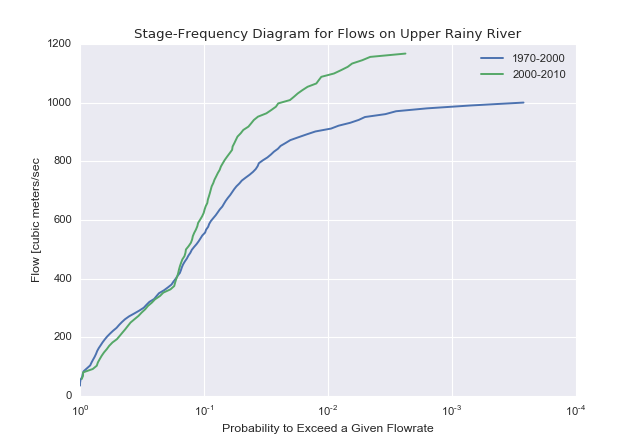

In [21]:
plt.figure()

plt.hold(True)

hist,bins = np.histogram([q for q in RR['1970':'2000'] if pd.notnull(q)],
                         bins = 100)
c = np.cumsum(hist)
c = [1-float(x)/c.max() for x in c]
plt.semilogx(c,bins[:-1])

hist,bins = np.histogram([q for q in RR['2000':] if pd.notnull(q)],
                         bins = 100)
c = np.cumsum(hist)
c = [1-float(x)/c.max() for x in c]
plt.semilogx(c,bins[:-1])
plt.gca().invert_xaxis()
plt.legend(['1970-2000','2000-2010'])

plt.xlabel('Probability to Exceed a Given Flowrate')
plt.ylabel('Flow [cubic meters/sec')
plt.title('Stage-Frequency Diagram for Flows on Upper Rainy River')

plt.hold(False)
plt.savefig(img + 'RainyRiverStageFrequency.png')

## <a name=section05></a>Discharge Characteristics

Upper Rainy River is the sole outlet of Rainy Lake, so the discharge characteristics (i.e., the relationship between lake level and flow in the Upper Rainy River) is critical to determination of the lake level dynamics.


<IPython.core.display.Javascript object>


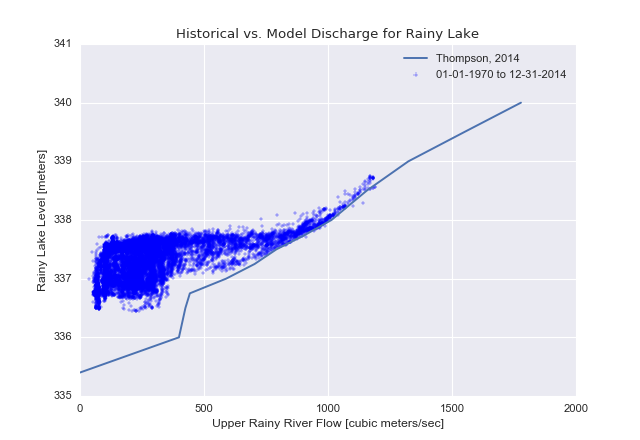

In [22]:
# Get historical flowrates and levels on RR and RL
RR = pd.read_pickle(dir+'RR.pkl')['1970':]
RL = pd.read_pickle(dir+'RL.pkl')['1970':]

Q = pd.concat([RR,RL],axis=1)
Q.columns = ['RR','RL']

# Discharge Relationship (Peterson, 2014)
RLdischarge = [
    [335.40,    0.0],
    [336.00,  399.0],
    [336.50,  425.0],
    [336.75,  443.0],
    [337.00,  589.0],
    [337.25,  704.0],
    [337.50,  792.0],
    [337.75,  909.0],
    [338.00, 1014.0],
    [338.50, 1156.0],
    [339.00, 1324.0],
    [339.50, 1550.0],
    [340.00, 1778.0]
]
RLdischarge = pd.DataFrame(RLdischarge)

plt.figure()

plt.hold(True)

# Create scatter plot of historical levels/flowrates
plt.scatter(Q['RR'],Q['RL'],marker='+',color='b')

# Plot discharge model of the LWCB secretariat as 
# reported by Thompson, 2014
plt.plot(RLdischarge[1],RLdischarge[0])

plt.hold(False)
ax = plt.axis()
plt.axis([0,ax[1],ax[2],ax[3]])
dates = Q.index.min().strftime('%m-%d-%Y') \
        + ' to ' + RR.index.max().strftime('%m-%d-%Y')
plt.legend(['Thompson, 2014',dates])
plt.xlabel('Upper Rainy River Flow [cubic meters/sec]')
plt.ylabel('Rainy Lake Level [meters]')
plt.title('Historical vs. Model Discharge for Rainy Lake');


### Discharge Characteristics, 1970-2000 vs. 2000-2010

<IPython.core.display.Javascript object>


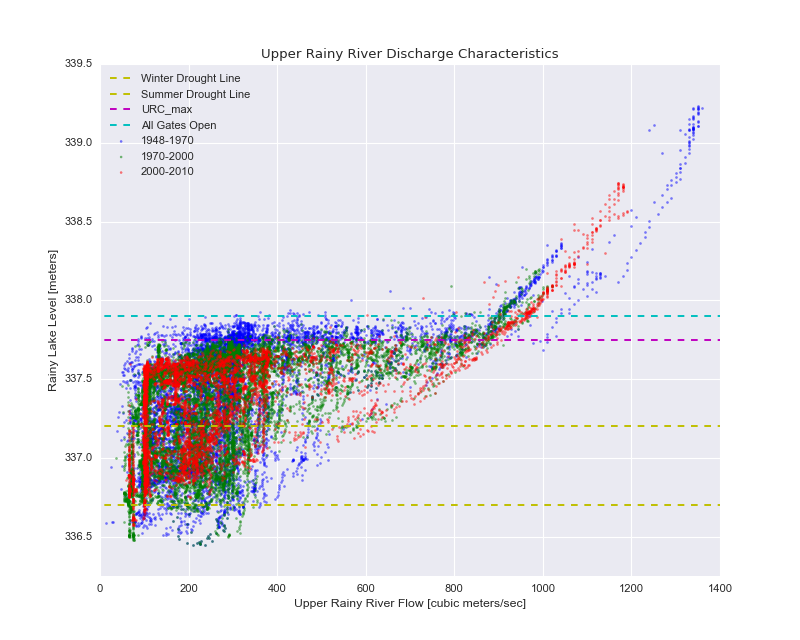

In [23]:
# Get historical flowrates and levels on RR and RL
RR = pd.read_pickle(dir+'RR.pkl')['1948':]
RL = pd.read_pickle(dir+'RL.pkl')['1948':]

Q = pd.concat([RR,RL],axis=1)
Q.columns = ['RR','RL']

A = Q['1948':'1970']

plt.figure(figsize=(10,8))
plt.hold(True)
plt.scatter(A['RR'],A['RL'],marker='.',color='b',alpha = 0.5,s=15)
B = Q['1970':'2000']
plt.scatter(B['RR'],B['RL'],marker='.',color='g',alpha = 0.5,s=15)
C = Q['2000':]
plt.scatter(C['RR'],C['RL'],marker='.',color='r',alpha = 0.5,s=15)


ax = plt.axis()
plt.plot([ax[0],ax[1]],[336.70,336.70],'y--')
plt.plot([ax[0],ax[1]],[337.20,337.20],'y--')
plt.plot([ax[0],ax[1]],[337.75,337.75],'m--')
plt.plot([ax[0],ax[1]],[337.90,337.90],'c--')

plt.xlabel('Upper Rainy River Flow [cubic meters/sec]')
plt.ylabel('Rainy Lake Level [meters]')
plt.title('Upper Rainy River Discharge Characteristics')
plt.xlim(0,1400)
plt.ylim(336.25,339.5)
plt.legend(['Winter Drought Line', \
            'Summer Drought Line', \
            'URC_max','All Gates Open', \
            '1948-1970','1970-2000','2000-2010',''],loc="upper left")

plt.hold(False)

fname = img + 'RainyRiverDischarge.png'

plt.savefig(fname)
!convert $fname -trim $fname

<IPython.core.display.Javascript object>


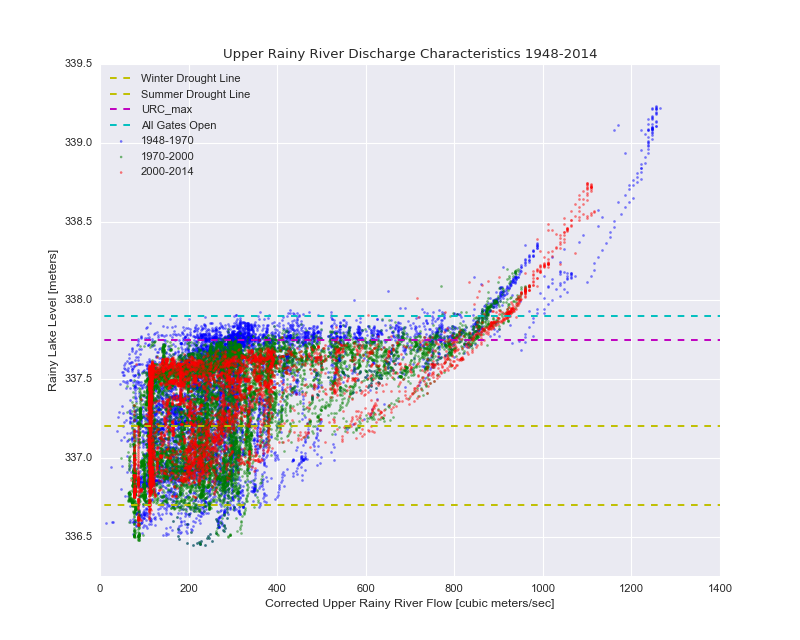

In [21]:
# Get historical flowrates and levels on RR and RL
RR_corrected = pd.read_pickle(dir+'RR_corrected.pkl')['1948':]
RL = pd.read_pickle(dir+'RL.pkl')['1948':]

Q = pd.concat([RR_corrected,RL],axis=1)
Q.columns = ['RR_corrected','RL']

A = Q['1948':'1970']

plt.figure(figsize=(10,8))
plt.hold(True)
plt.scatter(A['RR_corrected'],A['RL'],marker='.',color='b',alpha = 0.5,s=15)
B = Q['1970':'2000']
plt.scatter(B['RR_corrected'],B['RL'],marker='.',color='g',alpha = 0.5,s=15)
C = Q['2000':]
plt.scatter(C['RR_corrected'],C['RL'],marker='.',color='r',alpha = 0.5,s=15)


ax = plt.axis()
plt.plot([ax[0],ax[1]],[336.70,336.70],'y--')
plt.plot([ax[0],ax[1]],[337.20,337.20],'y--')
plt.plot([ax[0],ax[1]],[337.75,337.75],'m--')
plt.plot([ax[0],ax[1]],[337.90,337.90],'c--')

plt.xlabel('Corrected Upper Rainy River Flow [cubic meters/sec]')
plt.ylabel('Rainy Lake Level [meters]')
plt.title('Upper Rainy River Discharge Characteristics 1948-2014')
plt.xlim(0,1400)
plt.ylim(336.25,339.5)
plt.legend(['Winter Drought Line', \
            'Summer Drought Line', \
            'URC_max','All Gates Open', \
            '1948-1970','1970-2000','2000-2014',''],loc="upper left")

plt.hold(False)

fname = img + 'RainyRiverDischarge_corrected.png'

plt.savefig(fname)
!convert $fname -trim $fname

<IPython.core.display.Javascript object>


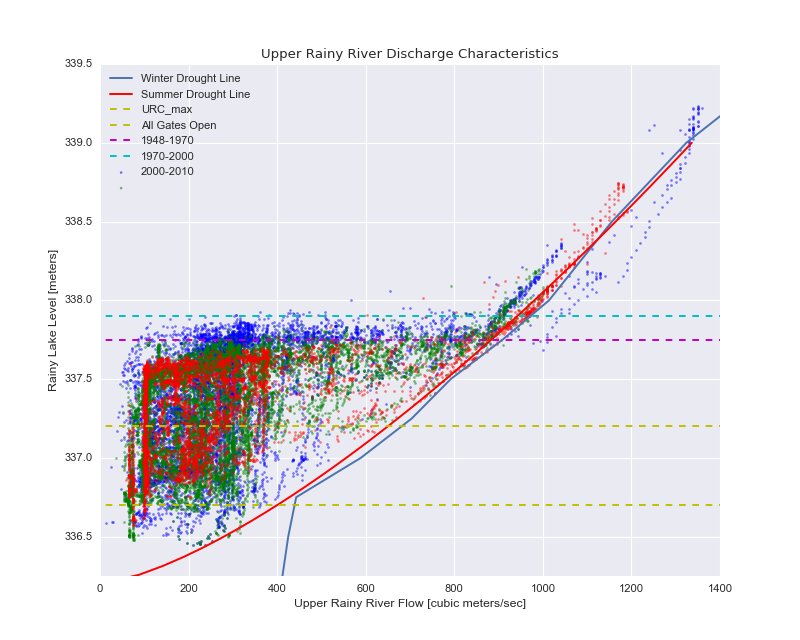

In [24]:
# Get historical flowrates and levels on RR and RL
RR = pd.read_pickle(dir+'RR.pkl')['1948':]
RL = pd.read_pickle(dir+'RL.pkl')['1948':]

Q = pd.concat([RR,RL],axis=1)
Q.columns = ['RR','RL']

A = Q['1948':'1970']

plt.figure(figsize=(10,8))
plt.hold(True)
plt.scatter(A['RR'],A['RL'],marker='.',color='b',alpha = 0.5,s=15)
B = Q['1970':'2000']
plt.scatter(B['RR'],B['RL'],marker='.',color='g',alpha = 0.5,s=15)
C = Q['2000':]
plt.scatter(C['RR'],C['RL'],marker='.',color='r',alpha = 0.5,s=15)

plt.plot(RLdischarge[1],RLdischarge[0])

h = np.linspace(336.2,339.0)
q = 650.0*(h-336.2)**0.7
plt.plot(q,h,'r')

ax = plt.axis()
plt.plot([ax[0],ax[1]],[336.70,336.70],'y--')
plt.plot([ax[0],ax[1]],[337.20,337.20],'y--')
plt.plot([ax[0],ax[1]],[337.75,337.75],'m--')
plt.plot([ax[0],ax[1]],[337.90,337.90],'c--')

plt.xlabel('Upper Rainy River Flow [cubic meters/sec]')
plt.ylabel('Rainy Lake Level [meters]')
plt.title('Upper Rainy River Discharge Characteristics')
plt.xlim(0,1400)
plt.ylim(336.25,339.5)
plt.legend(['Winter Drought Line', \
            'Summer Drought Line', \
            'URC_max','All Gates Open', \
            '1948-1970','1970-2000','2000-2010',''],loc="upper left")

plt.hold(False)

fname = img + 'RainyRiverDischarge_Fit.png'

plt.savefig(fname)
!convert $fname -trim $fname

## Conclusions